In [105]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fftpack import next_fast_len
import scipy
import scipy.io
aif = np.load(r'data/curve_estimates/aif_estimates_3.npy')
tac = np.load(r'data/curve_estimates/tacs_estimates_3.npy')
tac = tac[0,120,120]

In [106]:
# aif = scipy.io.loadmat('data/aif_data.mat')['aif'][0]
# curves = scipy.io.loadmat('data/image_data_sd_2.5.mat')['image_data']
# tac = curves[128,128,-1]
kernel = np.array([0.15, 0.5, 0.25])
tac = np.convolve(kernel, tac, mode='valid')
tac = np.pad(tac, (0,2), mode='edge')

aif = aif - np.mean(aif[:4])

tac = tac - np.mean(tac[:4])

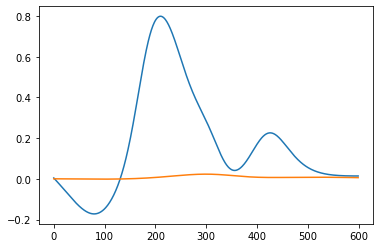

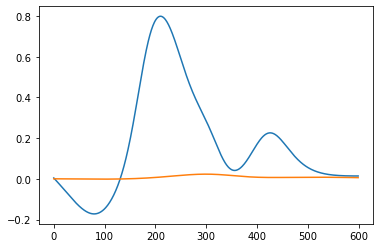

In [107]:
plt.plot(aif)
plt.plot(tac)
plt.show()


# aif_padded = np.pad(aif, (aif.shape[0]//2, aif.shape[0]//2), mode='edge')
# tac_padded = np.pad(tac, (tac.shape[0]//2, 0), mode='edge')
aif_padded = np.pad(aif, (0, 0), mode='edge')
tac_padded = np.pad(tac, (0, 0), mode='edge')
plt.plot(aif_padded)
plt.plot(tac_padded)

plt.show()

In [108]:
# recovered, remainder = scipy.signal.deconvolve(tac_padded, aif_padded)
# Using the deconvolution theorem
f_A = np.fft.fft(aif_padded)
f_B = np.fft.fft(tac_padded)
# I know that you should use a regularization here
r = f_B / f_A

# dk should be equal to kernel
# shift to get zero abscissa in the middle:
dk = np.fft.ifft(r)
dk=np.fft.fftshift(dk).real
dk

array([-2.35716967e-03, -2.09710768e-03, -1.83110663e-03, -1.49944649e-03,
       -1.18177181e-03, -8.14490244e-04, -4.37261135e-04, -3.48977464e-05,
        3.50757775e-04,  7.77074930e-04,  1.17735432e-03,  1.57991648e-03,
        1.96820240e-03,  2.32228656e-03,  2.68996665e-03,  3.02383098e-03,
        3.30836338e-03,  3.54980725e-03,  3.75948046e-03,  3.94684587e-03,
        4.03707562e-03,  4.11309096e-03,  4.12087132e-03,  4.07981984e-03,
        3.96915366e-03,  3.80346938e-03,  3.57963358e-03,  3.32974227e-03,
        2.97511752e-03,  2.61426764e-03,  2.18992191e-03,  1.74175843e-03,
        1.24973462e-03,  7.21721829e-04,  1.89211203e-04, -3.56469895e-04,
       -9.14119917e-04, -1.46970215e-03, -2.00994150e-03, -2.52511358e-03,
       -3.01675722e-03, -3.46935667e-03, -3.89262459e-03, -4.26599031e-03,
       -4.57504960e-03, -4.83288517e-03, -5.03035825e-03, -5.16275519e-03,
       -5.22011870e-03, -5.21956267e-03, -5.15003047e-03, -5.00757373e-03,
       -4.80245355e-03, -

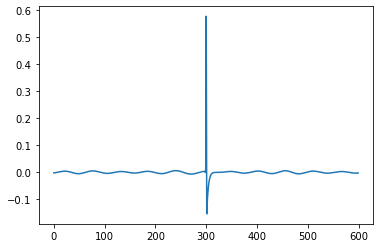

In [111]:
# plt.scatter([i for i in range(30)], dk)
# plt.show()
plt.plot(dk)
plt.show()

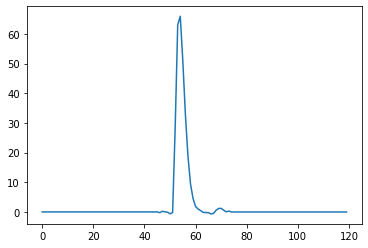

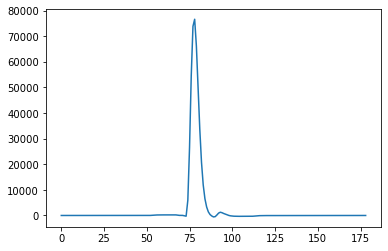

In [75]:
out_padded = np.pad(out, (out.shape[0]//2, out.shape[0]//2), mode='edge')
plt.plot(out_padded)
plt.show()

reconv = scipy.signal.convolve(aif_padded, out_padded)
plt.plot(reconv)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fftpack import next_fast_len

# A, in the description above
A = np.ones([600])
kernel = np.ones([600])
paddedB = convolve(kernel, A, mode='full')
plt.plot(paddedB)
plt.show()
paddedB=np.zeros(paddedB.shape[0])
paddedB[kernel.shape[0]//2: kernel.shape[0]//2+A.shape[0]]=tac[:]
paddedB.shape

In [ ]:
paddedA=np.zeros(paddedB.shape[0])
paddedA[kernel.shape[0]//2: kernel.shape[0]//2+A.shape[0]]=aif[:]

paddedA.shape

In [ ]:
#pad both signal and kernel. Requires the size of the kernel

# Using the deconvolution theorem
f_A = np.fft.fft(paddedA)
f_B = np.fft.fft(paddedB)
# I know that you should use a regularization here
r = f_B / f_A

# dk should be equal to kernel
dk = np.fft.ifft(r)
# shift to get zero abscissa in the middle:
dk=np.fft.fftshift(dk)

In [ ]:
plt.plot(np.real(dk))
